In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [169]:
# Importing common Modules
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
# Extracting the data
data = pd.read_csv("/kaggle/input/titanic/train.csv")
display(data.head(5))

# Shape of data
print("Shape of data = ",data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Shape of data =  (891, 12)


In [171]:
# Checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
# Checking NULLs
print(data.isnull().sum())

# Imputing NULLs in AGE column with the mean of total people
data['Age']=data['Age'].fillna(data['Age'].mean())
print(data['Age'].isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0


In [173]:
# Removing non-important columns
data1=data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
display(data1.head(2))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [174]:
# Label Encoding SEX and EMBARKED columns
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data1['Sex']=label.fit_transform(data1['Sex'])
data1['Embarked']=label.fit_transform(data1['Embarked'])
display(data1.head(2))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [175]:
# Splitting the data into input and output
x=data1.drop(['Survived'], axis=1)
y=data1['Survived']

display(x.head(2))
display(y.head(2))

display(y.unique())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0


0    0
1    1
Name: Survived, dtype: int64

array([0, 1])

##### Since the output is 0 and 1, so we would be using classification models

In [176]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x= pd.DataFrame(scale.fit_transform(x), columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
display(x.head(2))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.581114
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.938460


# **Using Train-Test Split**

In [177]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

### Logistic Regression

In [178]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10e5)
model.fit(x_train, y_train)

# Checking if the model is overfitting
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Model score
y_pred = model.predict(x_test)
print("Accuracy_score", metrics.accuracy_score(y_test, y_pred))
print("R2_score", metrics.r2_score(y_test, y_pred))

0.8117977528089888
0.7597765363128491
Accuracy_score 0.7597765363128491
R2_score -0.014097496706192425


### KNN Classification

In [179]:
# KNN Classification
# with max_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
i_max=0
r2_score_max=0
acc_score_max=0
for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = metrics.r2_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    if (acc > acc_score_max):
        r2_score_max=r2
        acc_score_max=acc
        i_max=i

# Model score
print("n_neighbors", i_max)
print("Accuracy_score", acc_score_max)
print("R2_score", r2_score_max)

n_neighbors 13
Accuracy_score 0.776536312849162
R2_score 0.0566534914361001


### Decision Tree without Pruning

0.9831460674157303
0.7150837988826816
Accuracy_score 0.7150837988826816
R2_score -0.2027667984189725


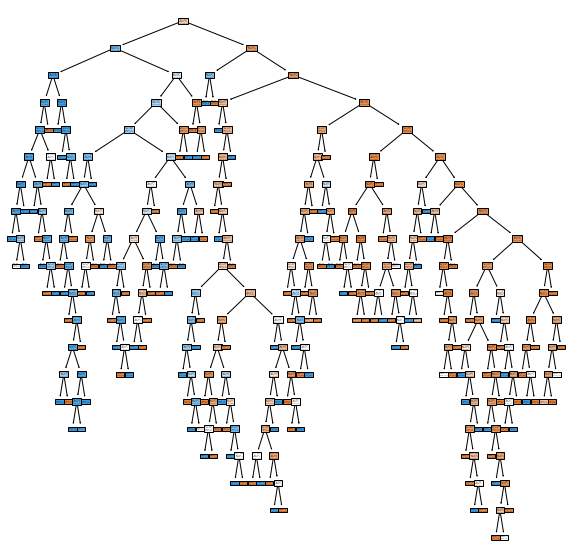

In [180]:
# Decision Tree
# without pruning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=7)
model.fit(x_train, y_train)

# Checking if the model is overfitting
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Model score
y_pred=model.predict(x_test)
print("Accuracy_score", metrics.accuracy_score(y_test, y_pred))
print("R2_score", metrics.r2_score(y_test, y_pred))

# Viewing Tree
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True)
plt.show()

### Decision Tree with Pruning

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mess

{'splitter': 'random',
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

0.8441011235955056
0.770949720670391
Accuracy_score 0.770949720670391
R2_score 0.03306982872200259


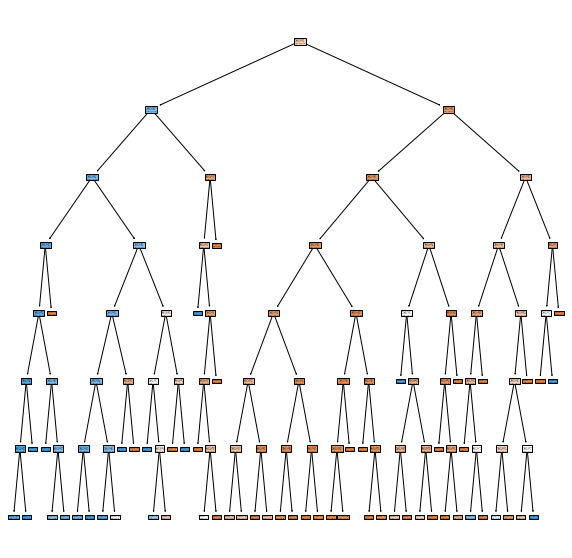

In [181]:
# Decision Tree
# with pruning
import numpy as np
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto', 'sqrt', 'log2']
}

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=7)
from sklearn.model_selection import RandomizedSearchCV
model2 = RandomizedSearchCV(model, param_distributions=parameters, cv=5, scoring='accuracy')
model2.fit(x_train, y_train)
display(model2.best_params_)


# Creating best model
model = DecisionTreeClassifier(splitter= 'random', max_features= 'log2', max_depth= 7, criterion= 'gini', random_state=7)
model.fit(x_train, y_train)

# Checking if the model is overfitting
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Model score
y_pred=model.predict(x_test)
print("Accuracy_score", metrics.accuracy_score(y_test, y_pred))
print("R2_score", metrics.r2_score(y_test, y_pred))

# Viewing Tree
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True)
plt.show()

### Random Forest

In [182]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=3)
model.fit(x_train, y_train)

# Checking if the model is overfitting
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# Model score
y_pred = model.predict(x_test)
print("Accuracy_score", metrics.accuracy_score(y_test, y_pred))
print("R2_score", metrics.r2_score(y_test, y_pred))

0.9831460674157303
0.770949720670391
Accuracy_score 0.770949720670391
R2_score 0.03306982872200259


## Result:
#### Random Forest and Decision tree with pruning are having similar accuracy score of 77%

**Going ahead with Random Forest**

In [218]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())
test_data1=test_data.drop(['PassengerId','Name', 'Cabin', 'Ticket'], axis = 1)
label = LabelEncoder()
test_data1['Sex']=label.fit_transform(test_data1['Sex'])
test_data1['Embarked']=label.fit_transform(test_data1['Embarked'])
scale = StandardScaler()
test_data1= pd.DataFrame(scale.fit_transform(test_data1), columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
display(test_data1.head(2))

gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
display(gender_submission.head(2))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.498407,-0.470915
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.513274,0.700767


,PassengerId,Survived
0,892,0
1,893,1


In [223]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=3)
model.fit(x, y)

# Model predict
y_pred = pd.DataFrame(model.predict(test_data1), columns=['Survived'])
test_x=pd.DataFrame(test_data['PassengerId'], columns=['PassengerId'])

df=pd.concat([test_x, y_pred], axis=1)
print(df)

df.to_csv('submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
